In [1]:
from scipy.fft import fft, fftfreq, ifft,fftshift,ifftshift,fft2,ifft2
from scipy.special import j1, gamma
import numpy as np
import matplotlib.pyplot as plt
from function import circ, jinc, rect

In [2]:
n = 2048
k = 4
r0 = int(n/k)
x = np.arange(n)
ro = np.arange(r0)
X,Y = np.meshgrid(r0,r0)
speckleint = np.zeros((r0,r0))
n_pattern = 10
for i in range(int(n_pattern)):
    # amp = np.random.normal(0,1,(r0,r0)) / np.sqrt(n_pattern)
    amp = np.sqrt(128) / np.sqrt(n_pattern)
    start = amp * np.exp(1j*2*np.pi*np.random.uniform(0,1,(r0,r0)))
    specklefield = fft2(fftshift(start))
    speckleint += np.abs(specklefield)**2/r0**2
    start = np.pad(start,(int((n-r0)/2),int((n-r0)/2)))

In [3]:
mean = np.mean(speckleint)
sd = np.std(speckleint)
print("mean =", mean)
print("sd =",sd)
print("SC =", sd/mean)

mean = 128.00000000000003
sd = 40.53313789982997
SC = 0.31666513984242156


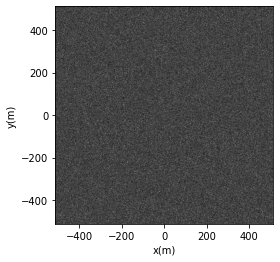

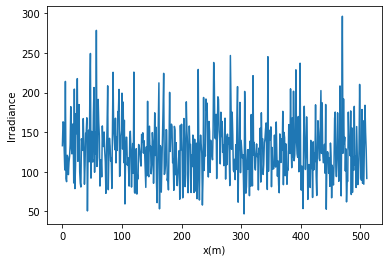

In [4]:
l=512
plt.imshow(speckleint, extent=[-l,l,-l,l],cmap = "gray")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()
plt.plot(ro,speckleint[:,round(r0/2)+1])
plt.xlabel("x(m)")
plt.ylabel("Irradiance")
plt.show()

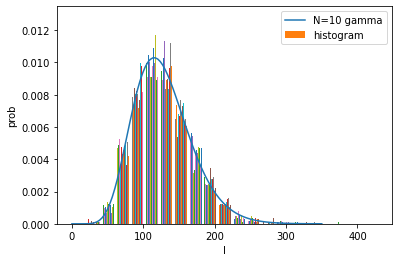

In [9]:
N = n_pattern
Is = np.linspace(0,350,100)
ga = 1*N**N*Is**(N-1)/gamma(N)/mean**N * np.exp(-N*Is/mean)
plt.plot(Is, ga)
plt.hist(speckleint, bins=20, density=True)
plt.xlabel("I")
plt.ylabel("prob")
plt.legend(["N=10 gamma", "histogram"])
plt.show()